In [1]:
import pandas as pd

# Define larger dataset
data = {
    'Income': [50000, 30000, 45000, 60000, 25000, 70000, 55000, 40000, 62000, 28000,
               53000, 31000, 67000, 59000, 27000, 71000, 57000, 42000, 65000, 29000],
    'Employment_Type': ['Salaried', 'Self-Employed', 'Salaried', 'Salaried', 'Self-Employed',
                        'Salaried', 'Self-Employed', 'Salaried', 'Salaried', 'Self-Employed',
                        'Salaried', 'Self-Employed', 'Salaried', 'Salaried', 'Self-Employed',
                        'Salaried', 'Self-Employed', 'Salaried', 'Salaried', 'Self-Employed'],
    'Credit_Score': [750, 620, 680, 780, 580, 800, 650, 700, 770, 600,
                     690, 640, 785, 740, 590, 810, 660, 720, 780, 610],
    'Loan_Amount': [200000, 150000, 180000, 250000, 100000, 300000, 220000, 170000, 240000, 140000,
                    210000, 160000, 290000, 230000, 130000, 310000, 225000, 175000, 260000, 145000],
    'Loan_Approval': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
                      'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv('Loan_Data.csv', index=False)

print("CSV file saved successfully!")


CSV file saved successfully!


In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Loan_Data.csv')

# Display the first few rows
print(df.head())


   Income Employment_Type  Credit_Score  Loan_Amount Loan_Approval
0   50000        Salaried           750       200000           Yes
1   30000   Self-Employed           620       150000            No
2   45000        Salaried           680       180000           Yes
3   60000        Salaried           780       250000           Yes
4   25000   Self-Employed           580       100000            No


Income             0
Employment_Type    0
Credit_Score       0
Loan_Amount        0
Loan_Approval      0
dtype: int64
             Income  Credit_Score    Loan_Amount
count     20.000000     20.000000      20.000000
mean   48300.000000    697.750000  204250.000000
std    15785.069561     76.304015   59433.177869
min    25000.000000    580.000000  100000.000000
25%    30750.000000    635.000000  157500.000000
50%    51500.000000    695.000000  205000.000000
75%    60500.000000    772.500000  242500.000000
max    71000.000000    810.000000  310000.000000


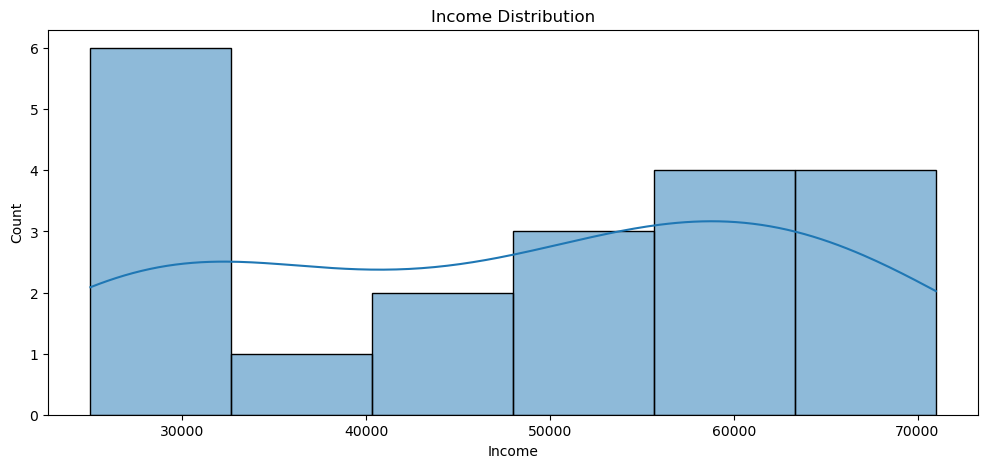

In [5]:
# Check for missing values
print(df.isnull().sum())

# Display summary statistics
print(df.describe())

# Visualize the distribution of Income, Credit Score, and Loan Amount
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.histplot(df['Income'], kde=True)
plt.title("Income Distribution")
plt.show()


In [7]:
df['Employment_Type'] = df['Employment_Type'].map({'Salaried': 1, 'Self-Employed': 0})
df['Loan_Approval'] = df['Loan_Approval'].map({'Yes': 1, 'No': 0})


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Loan_Approval'])  # Features
y = df['Loan_Approval']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [15]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Display some predictions
print("Predicted Loan Approval:", y_pred)


Predicted Loan Approval: [1 1 1 0]


In [17]:
from sklearn.metrics import accuracy_score, classification_report

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [19]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predict & Check Accuracy
y_pred_log = log_model.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")


Logistic Regression Accuracy: 1.00


In [21]:
df['Debt_To_Income'] = df['Loan_Amount'] / df['Income']


In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [1]:
!pip install --upgrade pip


In [11]:
import pandas as pd

# Load the dataset from CSV
df = pd.read_csv("Loan_Data.csv")

# Check if it's loaded correctly
print(df.head())  # Show first few rows


   Income Employment_Type  Credit_Score  Loan_Amount Loan_Approval
0   50000        Salaried           750       200000           Yes
1   30000   Self-Employed           620       150000            No
2   45000        Salaried           680       180000           Yes
3   60000        Salaried           780       250000           Yes
4   25000   Self-Employed           580       100000            No


In [13]:
X = df.drop(columns=['Loan_Approval'])  # Features
y = df['Loan_Approval']  # Target variable


In [19]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Loan_Approval'])  # Features
y = df['Loan_Approval']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
df['Employment_Type'] = df['Employment_Type'].map({'Salaried': 1, 'Self-Employed': 0})


In [42]:
print(X_train.dtypes)



Income              int64
Employment_Type    object
Credit_Score        int64
Loan_Amount         int64
dtype: object


In [44]:
X_train['Employment_Type'] = X_train['Employment_Type'].map({'Salaried': 1, 'Self-Employed': 0})
X_test['Employment_Type'] = X_test['Employment_Type'].map({'Salaried': 1, 'Self-Employed': 0})


In [46]:
print(X_train.head())  # Ensure all values are numeric


    Income  Employment_Type  Credit_Score  Loan_Amount
8    62000                1           770       240000
5    70000                1           800       300000
11   31000                0           640       160000
3    60000                1           780       250000
18   65000                1           780       260000


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
model.fit(X_train_scaled, y_train)

print("Model training complete! 🚀")


Model training complete! 🚀


In [54]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Display some predictions
print("Predicted Loan Approval:", y_pred[:10])  # Show first 10 predictions


Predicted Loan Approval: ['Yes' 'Yes' 'Yes' 'No']


In [56]:
from sklearn.metrics import accuracy_score, classification_report

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Show detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [58]:
pip install Flask


Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

# Load dataset from CSV
df = pd.read_csv("Loan_Data.csv")

# Check if it's loaded correctly
print(df.head())  # Show first few rows


   Income Employment_Type  Credit_Score  Loan_Amount Loan_Approval
0   50000        Salaried           750       200000           Yes
1   30000   Self-Employed           620       150000            No
2   45000        Salaried           680       180000           Yes
3   60000        Salaried           780       250000           Yes
4   25000   Self-Employed           580       100000            No


In [15]:
data = {
    'Income': [50000, 30000, 45000, 60000, 25000],
    'Employment_Type': ['Salaried', 'Self-Employed', 'Salaried', 'Salaried', 'Self-Employed'],
    'Credit_Score': [750, 620, 680, 780, 580],
    'Loan_Amount': [200000, 150000, 180000, 250000, 100000],
    'Loan_Approval': [1, 0, 1, 1, 0]  # 1 for Approved, 0 for Not Approved
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())


   Income Employment_Type  Credit_Score  Loan_Amount  Loan_Approval
0   50000        Salaried           750       200000              1
1   30000   Self-Employed           620       150000              0
2   45000        Salaried           680       180000              1
3   60000        Salaried           780       250000              1
4   25000   Self-Employed           580       100000              0


In [17]:
X = df.drop(columns=['Loan_Approval'])  # Features
y = df['Loan_Approval']  # Target variable


In [19]:
# Convert categorical values to numbers
X['Employment_Type'] = X['Employment_Type'].map({'Salaried': 1, 'Self-Employed': 0})


In [21]:
X['Debt_to_Income_Ratio'] = X['Loan_Amount'] / X['Income']
X['Risk_Score'] = X['Credit_Score'] / X['Loan_Amount']


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Loan_Approval'])
y = df['Loan_Approval']

# Convert categorical variables
X['Employment_Type'] = X['Employment_Type'].map({'Salaried': 1, 'Self-Employed': 0})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model without scaling
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained successfully without scaling!")


✅ Model trained successfully without scaling!


In [28]:
y_pred = model.predict(X_test)
print("Sample Predictions:", y_pred[:10])  # Display first 10 predictions


Sample Predictions: [0]


In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [32]:
import pickle

# Save the trained model
with open("loan_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [34]:
with open("loan_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Test if the model works
print("✅ Model loaded successfully!")
print("Model Accuracy:", loaded_model.score(X_test, y_test))


✅ Model loaded successfully!
Model Accuracy: 1.0


In [40]:
import os

# Verify the file exists
if os.path.exists("loan_model.pkl"):
    print("✅ Model file found!")
else:
    print("❌ Model file is missing, please save the model first.")


✅ Model file found!


In [42]:
import pickle

# Load model
with open("loan_model.pkl", "rb") as file:
    model = pickle.load(file)

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [74]:
import pickle

# Load the ML model when Flask starts
try:
    model = pickle.load(open("loan_model.pkl", "rb"))
    print("✅ Model loaded successfully")
except Exception as e:
    print("🚨 Error loading model:", e)


✅ Model loaded successfully


In [76]:
import requests

url = "http://127.0.0.1:5000/predict"
data = {"Income": 50000, "Credit_Score": 750, "Loan_Amount": 200000}

response = requests.post(url, json=data)

print("Status Code:", response.status_code)
print("Response Text:", response.text)


Status Code: 200
Response Text: {
  "message": "Prediction Route is Active!"
}

